# Aluminium

In [78]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from scipy.stats import linregress # type: ignore
from scipy.optimize import curve_fit # type: ignore
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [79]:
df = pd.read_excel(
    'Data.xlsx',  
    sheet_name='Aluminium', 
    usecols='C:M',  
    nrows=7
)
df.head(7)

,SN,Thickness,Counts,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Average Counts,NB,NB Per Sec,ln(nb)
0,1,1.05,411,352,450,460,398,414.2,323.4,5.390000,1.684545
1,2,1.12,364,413,395,350,325,369.4,278.6,4.643333,1.535432
2,3,2.17,152,171,165,238,173,179.8,89.0,1.483333,0.394292
3,4,3.82,170,156,115,149,120,142.0,51.2,0.853333,-0.158605
4,5,6.74,103,187,173,105,100,133.6,42.8,0.713333,-0.337806
5,6,8.70,150,131,153,91,130,131.0,40.2,0.670000,-0.400478


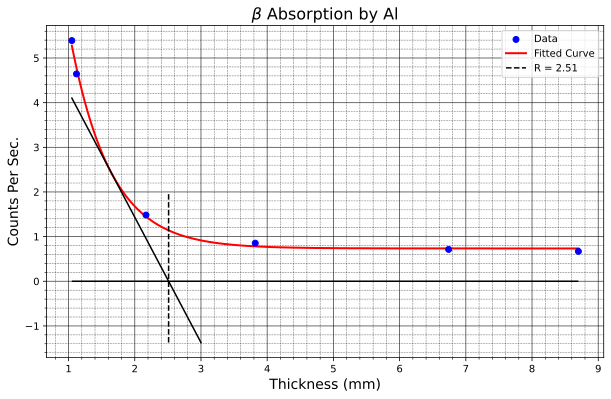

In [80]:
def neg_exp(x, a, b, c):
    return a * np.exp(-b * x) + c

def derivative(x, a, b):
    return -a * b * np.exp(-b * x)

# Plot the data and fitted curve
plt.figure(figsize=(10, 6))
plt.grid(which='major', linestyle='-', linewidth=0.8, color='Black', zorder=0, alpha=0.7)
plt.grid(which='minor', linestyle='--', linewidth=0.5, color='black', zorder=0, alpha=0.6)
plt.minorticks_on()

x = df['Thickness'].values
y = df['NB Per Sec'].values

# Fit the curve
params, covariance = curve_fit(neg_exp, x, y)
a, b, c = params  # Extract parameters

# Generate fine x and y points for the fitted curve
x_fine = np.linspace(min(x), max(x), 200)
y_fine = neg_exp(x_fine, a, b, c)

plt.scatter(x, y, color='blue', zorder=3, label="Data")
plt.plot(x_fine, y_fine, color='red', label="Fitted Curve",lw = 2, zorder=2)

#other lines
x_tangent = (x[1] + x[2])/2
y_tangent = neg_exp(x_tangent, a, b, c)
slope = derivative(x_tangent, a, b)
x_range = np.linspace(min(x), 3, 100)
tangent_line = slope * (x_range - x_tangent) + y_tangent

#tangent line
plt.plot(x_range, tangent_line, color = 'black')
plt.hlines(0, min(x), max(x), color = 'black')

x_intersect = -y_tangent / slope + x_tangent

#vertical line
plt.vlines(x_intersect, tangent_line[-1], 2, linestyles='--', color = 'black', label = f'R = {x_intersect:.2f}')

plt.xlabel('Thickness (mm)', fontsize=14)
plt.ylabel('Counts Per Sec.', fontsize=14)
plt.title(r'$\beta$ Absorption by Al', fontsize=16)
plt.legend()

plt.savefig('Counts_vs_Thickness_Al.png', bbox_inches='tight', dpi=600)
plt.show()


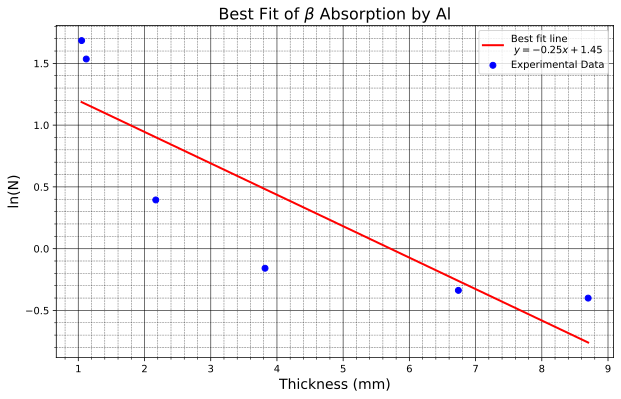

-0.2544815953836852


In [81]:
y = df['ln(nb)']
plt.figure(figsize=(10, 6))
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, slope * x + intercept, color='red',
             label=f'Best fit line \n $y = {slope:.2f} x + {intercept:.2f}$', lw = 2)
plt.scatter(x, y, c = 'blue', label = 'Experimental Data', zorder = 3)

plt.legend()
plt.xlabel('Thickness (mm)', fontsize = 14)
plt.ylabel('ln(N)', fontsize = 14)
plt.title(r'Best Fit of $\beta$ Absorption by Al', fontsize = 16)

plt.grid(which='major', linestyle='-', linewidth=0.8, color='Black', zorder = 0, alpha = 0.7)
plt.grid(which='minor', linestyle='--', linewidth=0.5, color='Black', zorder = 0, alpha = 0.6)
plt.minorticks_on()

plt.savefig('Best_Fit_Al.png', bbox_inches = 'tight', dpi = 600)
plt.show()

print(slope)

# Copper

In [82]:
df = pd.read_excel(
    'Data.xlsx',  
    sheet_name='Copper', 
    usecols='C:M',  
    nrows=7
)
df.head(7)

,SN,Thickness,Counts,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Average Counts,NB,NB Per Sec,ln(nb)
0,1,0.14,470,412,450,393,447,434.4,343.6,5.726667,1.745134
1,2,0.40,370,390,360,367,361,369.6,278.8,4.646667,1.536150
2,3,0.50,280,310,278,250,260,275.6,184.8,3.080000,1.124930
3,4,1.01,170,156,150,149,120,149.0,58.2,0.970000,-0.030459
4,5,1.15,120,187,150,105,130,138.4,47.6,0.793333,-0.231512
5,6,2.50,149,105,120,98,110,116.4,25.6,0.426667,-0.851752


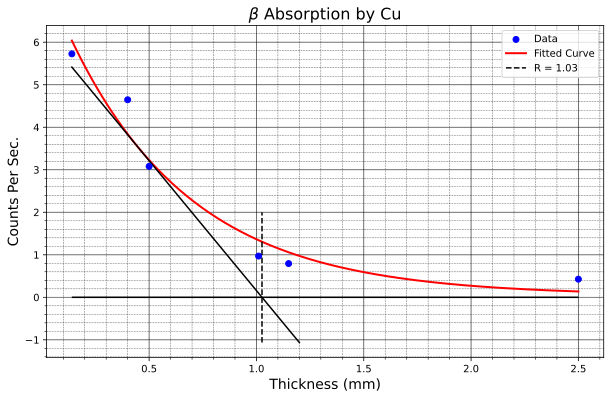

In [83]:
plt.figure(figsize=(10, 6))
plt.grid(which='major', linestyle='-', linewidth=0.8, color='Black', zorder = 0, alpha = 0.7)
plt.grid(which='minor', linestyle='--', linewidth=0.5, color='black', zorder = 0, alpha = 0.6)
plt.minorticks_on()

def neg_exp(x, a, b, c):
    return a * np.exp(-b * x) + c

def derivative(x, a, b):
    return -a * b * np.exp(-b * x)

x = df['Thickness'].values
y = df['NB Per Sec'].values

# Fit the curve
params, covariance = curve_fit(neg_exp, x, y)
a, b, c = params  # Extract parameters

# Generate fine x and y points for the fitted curve
x_fine = np.linspace(min(x), max(x), 200)
y_fine = neg_exp(x_fine, a, b, c)

plt.scatter(x, y, color = 'blue',marker = 'o', label = 'Data', zorder = 3)
plt.plot(x_fine, y_fine, color='red', label="Fitted Curve",lw = 2, zorder=2)

#other lines
x_tangent = (x[1] + x[2])/2
y_tangent = neg_exp(x_tangent, a, b, c)
slope = derivative(x_tangent, a, b)
x_range = np.linspace(min(x), 1.2, 100)
tangent_line = slope * (x_range - x_tangent) + y_tangent

#tangent line
plt.plot(x_range, tangent_line, color = 'black')
plt.hlines(0, min(x), max(x), color = 'black')

x_intersect = -y_tangent / slope + x_tangent

#vertical line
plt.vlines(x_intersect, tangent_line[-1], 2, linestyles='--', color = 'black', label = f'R = {x_intersect:.2f}')

plt.legend()
plt.xlabel('Thickness (mm)', fontsize = 14)
plt.ylabel('Counts Per Sec.', fontsize = 14)
plt.title(r'$\beta$ Absorption by Cu', fontsize = 16)
plt.savefig('Counts_vs_Thickness_Cu.png', bbox_inches = 'tight', dpi = 600)
plt.show()

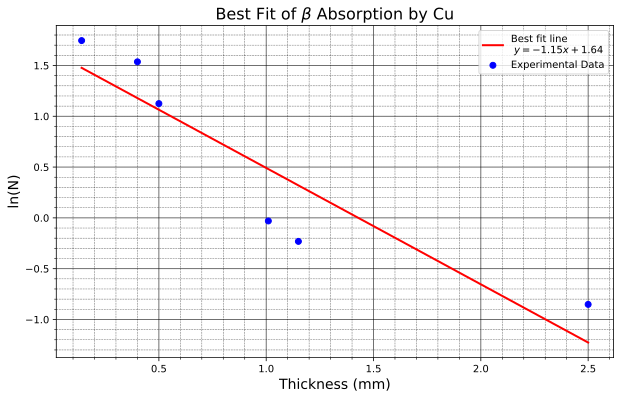

-1.1457654027184039


In [84]:
y = df['ln(nb)']
plt.figure(figsize=(10, 6))
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, slope * x + intercept, color='red',
             label=f'Best fit line \n $y = {slope:.2f} x + {intercept:.2f}$', lw = 2)
plt.scatter(x, y, c = 'blue', label = 'Experimental Data', zorder = 3)

plt.legend()
plt.xlabel('Thickness (mm)', fontsize = 14)
plt.ylabel('ln(N)', fontsize = 14)
plt.title(r'Best Fit of $\beta$ Absorption by Cu', fontsize = 16)

plt.grid(which='major', linestyle='-', linewidth=0.8, color='Black', zorder = 0, alpha = 0.7)
plt.grid(which='minor', linestyle='--', linewidth=0.5, color='Black', zorder = 0, alpha = 0.6)
plt.minorticks_on()

plt.savefig('Best_Fit_Cu.png', bbox_inches = 'tight', dpi = 600)
plt.show()

print(slope)

# Alpha Absorption

In [85]:
df = pd.read_excel(
    'Data.xlsx',  
    sheet_name='Alpha', 
    usecols='C:L',  
    nrows=12
)
df.head(15)

,SN,Thickness,Counts per 60 seconds,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Average,Average Per Sec,N
0,1.,0.5,1211,1227,1179,1275,1227,1223.8,122.38,120.24
1,2.,1.0,576,532,538,530,528,540.8,54.08,51.94
2,3.,1.5,204,193,200,246,225,213.6,21.36,19.22
3,4.,2.0,157,136,149,122,121,137.0,13.70,11.56
4,5.,2.5,111,104,100,100,110,105.0,10.50,8.36
5,6.,3.0,88,87,71,87,87,84.0,8.40,6.26
6,7.,3.5,77,73,66,77,83,75.2,7.52,5.38
7,8.,4.0,62,65,54,57,64,60.4,6.04,3.90
8,9.,4.5,47,41,56,40,47,46.2,4.62,2.48
9,10.,5.0,47,38,49,38,46,43.6,4.36,2.22


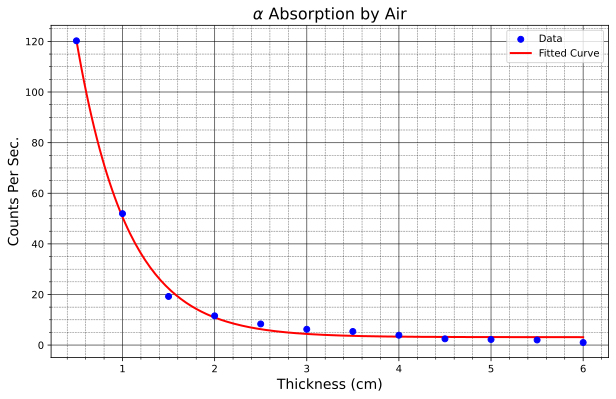

In [86]:
plt.figure(figsize=(10, 6))

def neg_exp(x, a, b, c):
    return a * np.exp(-b * x) + c

x = df['Thickness'].values
y = df['N'].values

# Fit the curve
initial_guesses = [max(y), 0.1, min(y)]
params, covariance = curve_fit(neg_exp, x, y, p0=initial_guesses)
a, b, c = params  # Extract parameters

# Generate fine x and y points for the fitted curve
x_fine = np.linspace(min(x), max(x), 200)
y_fine = neg_exp(x_fine, a, b, c)

plt.grid(which='major', linestyle='-', linewidth=0.8, color='Black', zorder = 0, alpha = 0.7)
plt.grid(which='minor', linestyle='--', linewidth=0.5, color='black', zorder = 0, alpha = 0.6)
plt.minorticks_on()

plt.scatter(x, y, color = 'blue',marker = 'o', label = 'Data', zorder = 3)
plt.plot(x_fine, y_fine, color='red', label="Fitted Curve",lw = 2, zorder=2)

plt.legend()
plt.xlabel('Thickness (cm)', fontsize = 14)
plt.ylabel('Counts Per Sec.', fontsize = 14)
plt.title(r'$\alpha$ Absorption by Air', fontsize = 16)
plt.savefig('Counts_vs_Thickness_Alpha.png', bbox_inches = 'tight', dpi = 600)
plt.show()

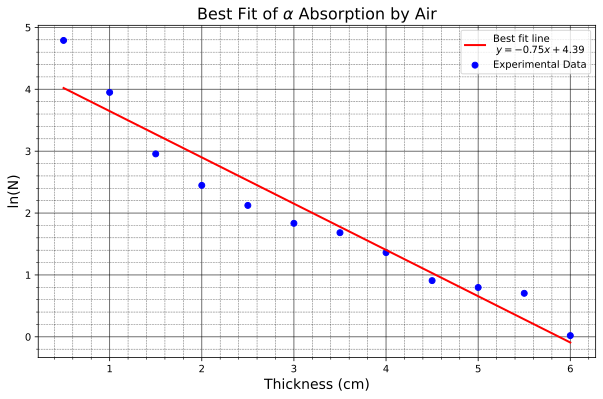

-0.7477901535300077


In [87]:
y = np.log(df['N'])
plt.figure(figsize=(10, 6))
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, slope * x + intercept, color='red',
             label=f'Best fit line \n $y = {slope:.2f} x + {intercept:.2f}$', zorder = 4, lw = 2)
plt.scatter(x, y, c = 'blue', label = 'Experimental Data', zorder = 3)

plt.legend()
plt.xlabel('Thickness (cm)', fontsize = 14)
plt.ylabel('ln(N)', fontsize = 14)
plt.title(r'Best Fit of $\alpha$ Absorption by Air', fontsize = 16)

plt.grid(which='major', linestyle='-', linewidth=0.8, color='Black', zorder = 0, alpha = 0.7)
plt.grid(which='minor', linestyle='--', linewidth=0.5, color='black', zorder = 0, alpha = 0.6)
plt.minorticks_on()

plt.savefig('Best_Fit_Alpha.png', bbox_inches = 'tight', dpi = 600)
plt.show()

print(slope)